# CEWA 568 Snow Hydrology - Spring 2023
## Lab 2-3: Kettle Ponds snow pillow and snow depth (from lidar) precipitation.

Written by Eli Schwat (elilouis@uw.edu) - December 2024.

## Library imports

In [7]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Open SoS Data

In [8]:
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)

Before plotting, we resample the SoS dataset by finding the daily mean. We don't need the 30 minute data to look at season long changes. Also, the snow pillow dataset has lots of nans so resampling makes the plot look better. The precipitaton dataset is already daily, so we don't need to resample it.

In [3]:
sos_dataset_daily = sos_dataset.resample(time="1440Min").mean()

Now we plot the data. Note that SWE_p1_c, SWE_p2_c, SWE_p3_c, SWE_p24_ corresponse to the snow pillows beneath towers UW, UE, C, D, respectively.

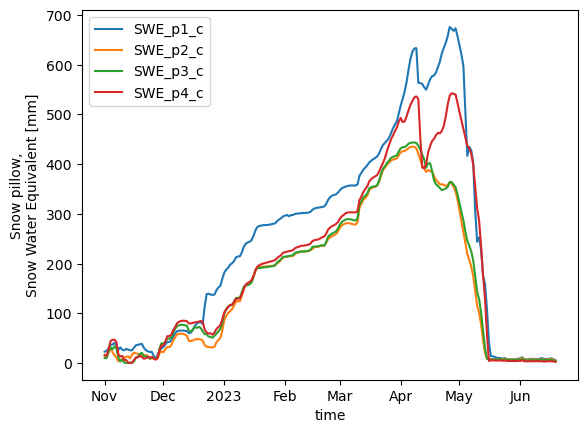

In [24]:
sos_dataset_daily['SWE_p1_c'].plot(label='SWE_p1_c')
sos_dataset_daily['SWE_p2_c'].plot(label='SWE_p2_c')
sos_dataset_daily['SWE_p3_c'].plot(label='SWE_p3_c')
sos_dataset_daily['SWE_p4_c'].plot(label='SWE_p4_c')
plt.legend()
plt.ylabel("Snow pillow,\nSnow Water Equivalent [mm]")
plt.show()

We have snow depth measurements from two towers - towers C and D. 

This corresponds to snow pillows p3 and p4, i.e. the variable `SnowDepth_c` corresponds to the measurements of snow depth over the snow pillow variable `SWE_p3_c` and the variable `SnowDepth_d` corresponds to the measurements of snow depth over the snow pillow variable `SWE_p4_c`.

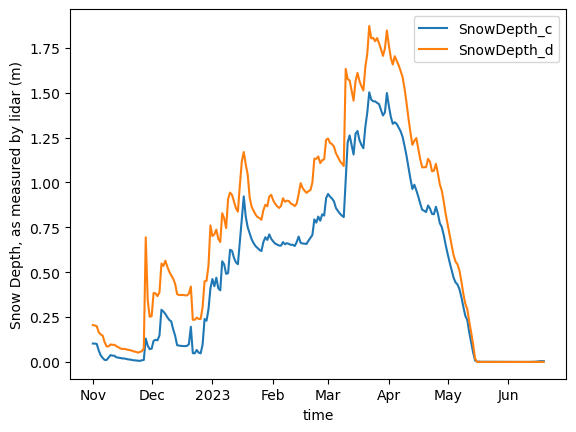

In [25]:
sos_dataset_daily['SnowDepth_c'].plot(label='SnowDepth_c')
sos_dataset_daily['SnowDepth_d'].plot(label='SnowDepth_d')
plt.legend()
plt.ylabel("Snow Depth, as measured by lidar (m)")
plt.show()

# Calculate snow density

We can calculate snow density (kg/$m^3$) by dividing SWE (in mm of water) by the snow depth (in m).

Text(0, 0.5, 'Snow Density (kg/m^3)')

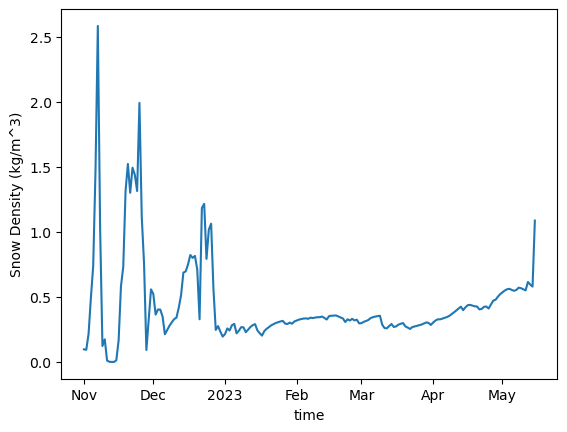

In [26]:
swe_in_m_p3_c = sos_dataset_daily['SWE_p3_c']/1000 # convert swe from mm to m
snowdensity_c = swe_in_m_p3_c / sos_dataset_daily['SnowDepth_c']

# note we cut off in mid may, after the snow has dissapeared - lots of wonky values after this date
snowdensity_c[:-35].plot()
plt.ylabel("Snow Density (kg/m^3)")

What do we think about the high values early in the season? Are they believable? What could be causing them?